Libraries

In [64]:
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gensim
from gensim.models import Word2Vec
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Hardcoded Stopwords List

In [65]:

DEFAULT_STOPWORDS = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', 'should', 'now'
])

# Custom Tokenizer

In [66]:
def simple_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()  # Split by whitespace

#Clean Text Function

In [67]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s.+]', '', text)
    tokens = simple_tokenize(text)
    return ' '.join([word for word in tokens if word not in DEFAULT_STOPWORDS])

#Fetching Jobs from Careerjet API

In [68]:
def fetch_jobs_from_careerjet(api_key, query, location='Remote', locale='en_US'):
    url = 'http://public.api.careerjet.net/search'
    params = {
        'keywords': query,
        'location': location,
        'affid': api_key,
        'locale_code': locale,
        'user_ip': '1.2.3.4',
        'user_agent': 'Mozilla/5.0',
        'page': 1
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        jobs = data.get('jobs', [])
        if jobs:
            return jobs[0]  # Fetch the first job listing
        else:
            return None
    except Exception as e:
        print(f" Error fetching jobs: {e}")
        return None

# Frequent N-grams

In [69]:

def get_ngrams(text, n):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

def most_common_ngrams(text, n, top_k=10):
    ngrams = get_ngrams(text, n)
    return Counter(ngrams).most_common(top_k)

#  Word Frequency Analysis

In [70]:
def word_frequency_analysis(text, n, title, top_k=20):
    ngrams = get_ngrams(text, n)
    ngram_counts = Counter(ngrams)
    common_ngrams = ngram_counts.most_common(top_k)
    df = pd.DataFrame(common_ngrams, columns=['Ngram', 'Frequency'])
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')
    plt.title(f'Top {n}-gram Frequencies - {title}')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

# Analyzing Resume vs Job

In [71]:
def analyze_resume_vs_job(job_text, resume_text, job_title, company, job_url):
    clean_jd = clean_text(job_text)
    clean_resume = clean_text(resume_text)

    tfidf_score = tfidf_similarity(clean_jd, clean_resume)
    bow_score = bow_similarity(clean_jd, clean_resume)
    bigram_score = bigram_similarity(clean_jd, clean_resume)
    trigram_score = trigram_similarity(clean_jd, clean_resume)
    w2v_score = word2vec_similarity(clean_jd, clean_resume)

    print("\n====================================")
    print(f"Analyzing Job: {job_title} at {company}")
    print("====================================")
    print(f"🔗 URL: {job_url}")
    print(f"TF-IDF Similarity: {tfidf_score}%")
    print(f"BoW Similarity: {bow_score}%")
    print(f"Bigram Similarity: {bigram_score}%")
    print(f"Trigram Similarity: {trigram_score}%")
    print(f"Word2Vec Similarity: {w2v_score}%")
    print("====================================\n")

    print("Most Common Unigrams in Job Description:")
    word_frequency_analysis(clean_jd, 1, "Job Description")
    print("Most Common Bigrams in Job Description:")
    word_frequency_analysis(clean_jd, 2, "Job Description")
    print("Most Common Trigrams in Job Description:")
    word_frequency_analysis(clean_jd, 3, "Job Description")

    print("Most Common Unigrams in Resume:")
    word_frequency_analysis(clean_resume, 1, "Resume")
    print("Most Common Bigrams in Resume:")
    word_frequency_analysis(clean_resume, 2, "Resume")
    print("Most Common Trigrams in Resume:")
    word_frequency_analysis(clean_resume, 3, "Resume")


# Use Case


Analyzing Job: AI Research Scientist: AEC. Remote US or Canada at Autodesk
🔗 URL: https://jobviewtrack.com/en-us/job-1813412c1c5d565a104622565e/fc7c2ab7ae734789e5d6a48f34f970ff.html?affid=your_careerjet_api_key_here
TF-IDF Similarity: 12.53%
BoW Similarity: 20.5%
Bigram Similarity: 1.31%
Trigram Similarity: 0.0%
Word2Vec Similarity: 30.11%

Most Common Unigrams in Job Description:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


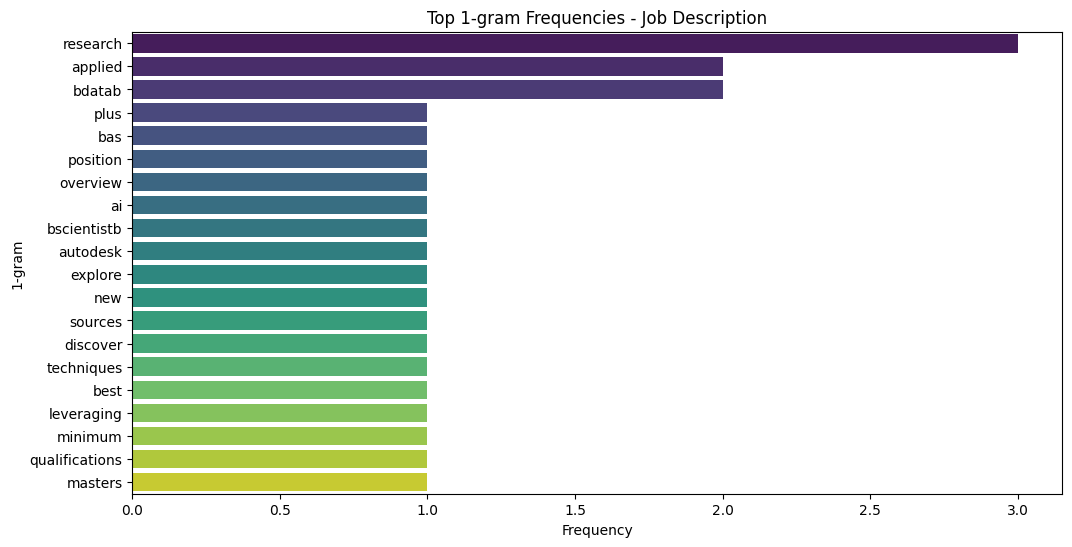

Most Common Bigrams in Job Description:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


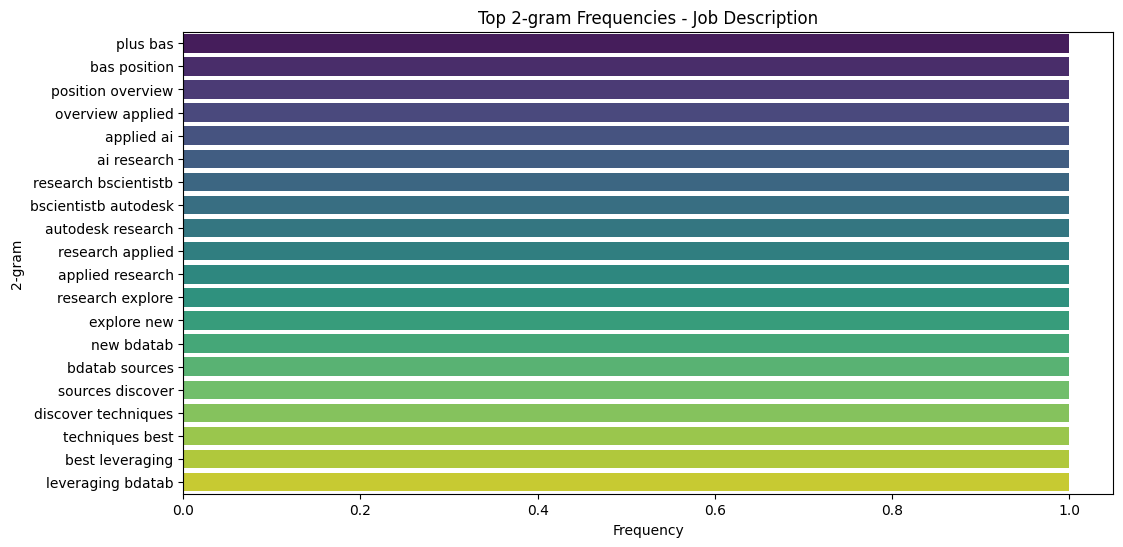

Most Common Trigrams in Job Description:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


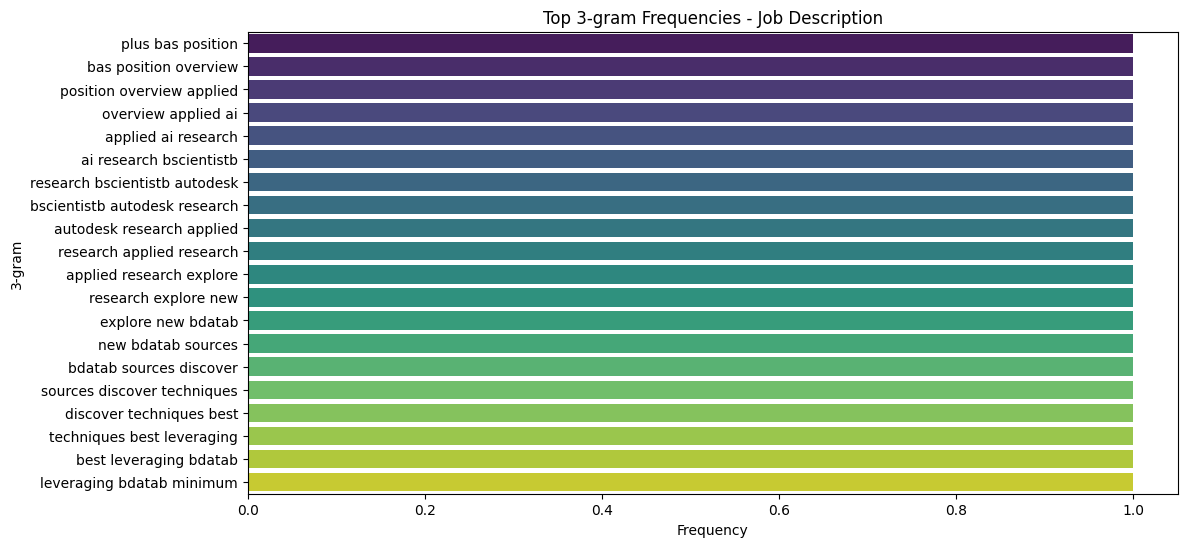

Most Common Unigrams in Resume:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


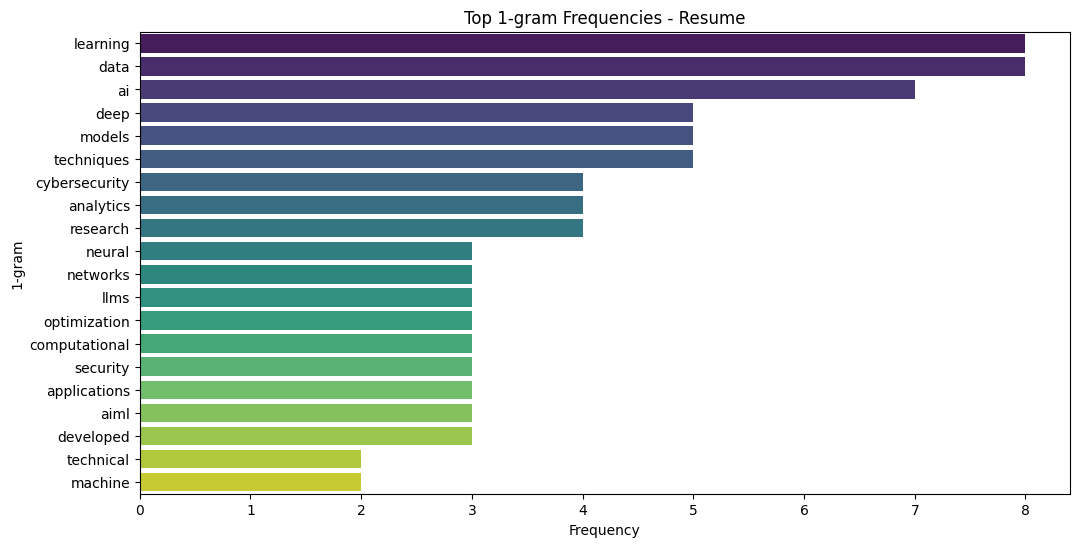

Most Common Bigrams in Resume:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


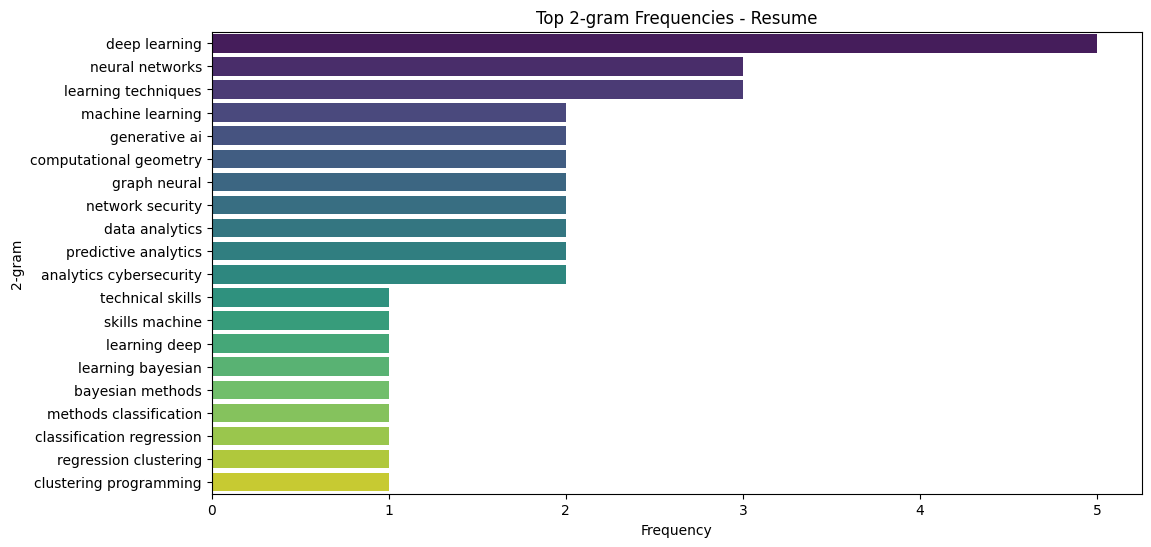

Most Common Trigrams in Resume:


<ipython-input-70-009e89dccb91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df, palette='viridis')


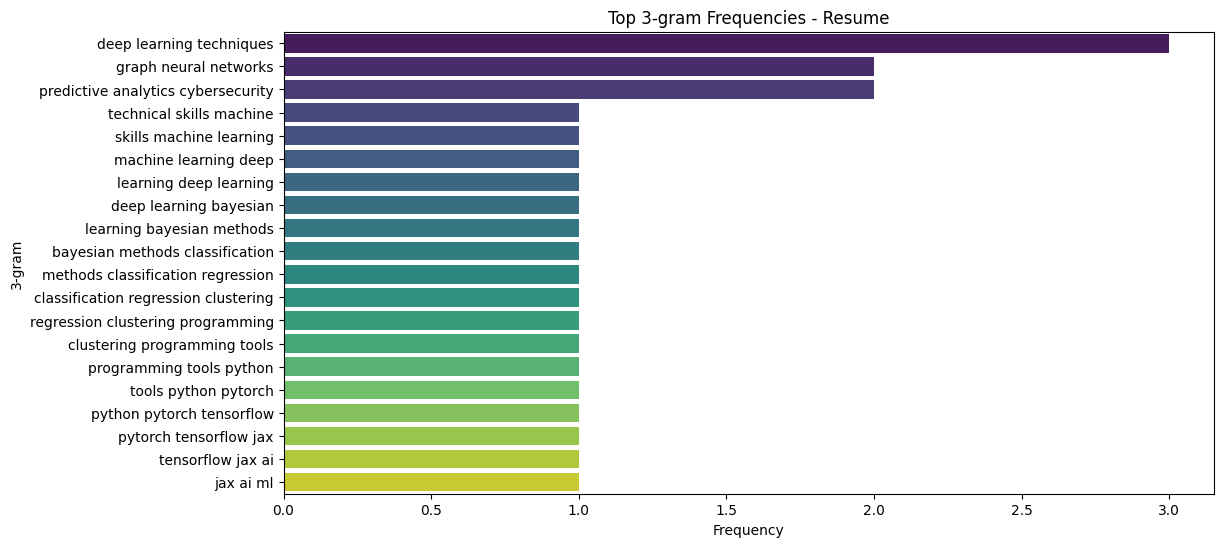

In [72]:
if __name__ == "__main__":
    resume_text = """
    Technical Skills

    Machine Learning: Deep Learning, Bayesian Methods, Classification, Regression, Clustering

    Programming & Tools: Python, PyTorch, TensorFlow, JAX

    AI & ML Frameworks: Neural Networks, Generative AI, Large Language Models (LLMs), Multi-modal Learning

    Data Science: Statistical Modeling, Optimization, Feature Engineering

    Structured Data & Computational Geometry: BIM models, IFC files, Graph Neural Networks

    Cybersecurity & IT: Risk Analysis, Network Security, System Administration

    Professional Experience

    IT Associate | Data Analytics & AI Research

    (Current Role)

    Designed and implemented ML models for predictive analytics and cybersecurity applications.

    Conducted applied research in AI/ML, focusing on deep learning techniques and optimization.

    Reviewed AI/ML literature to identify emerging methods and trends.

    Explored new data sources and developed techniques for efficient data utilization.

    Data Analytics & IT Technical Support

    Analyzed large datasets to optimize IT infrastructure and business processes.

    Developed automated solutions using Python to enhance data workflows.

    Provided system support and security solutions for small and mid-sized enterprises.

    Research & Projects

    Predictive Analytics & Cybersecurity: Developed AI-driven threat detection models for network security.

    LLMs for Document Understanding: Explored NLP techniques for extracting structured information from AEC contract documents.

    2D & 3D Generative AI: Researched geometric deep learning techniques for architecture and construction applications.

    Graph Neural Networks (GNNs): Implemented computational geometry-based AI models for BIM data analysis.

    Publications & Presentations

    Research on AI applications in cybersecurity and machine learning optimization (unpublished work in progress).

    Guest speaker at university AI/ML workshops discussing deep learning techniques.

    Preferred Qualifications & Expertise

    AI in Architecture, Engineering, and Construction (AEC)

    Computational Geometry & Topology for AI-driven design

    Multi-modal Deep Learning & Information Retrieval

    Natural Language Processing (NLP) & LLMs
    """
    # api_key = 'your_careerjet_api_key_here'  # Replace with actual Careerjet API key
    query = 'Data Scientist'
    location = 'Remote'

    job = fetch_jobs_from_careerjet(api_key, query, location)
    if job:
        analyze_resume_vs_job(job['description'], resume_text, job['title'], job['company'], job['url'])
    else:
        print("No job listings found for the given query.")



